# Coupled Adiabatic Reactors

Code is ported (almost) verbatim from cantera example file `piston.py` (distributed with cantera):
```
"""
Two reactors separated by a piston

Gas 1: a stoichiometric H2/O2/Ar mixture
Gas 2: a wet CO/O2 mixture

    -------------------------------------
    |          ||                       |
    |          ||                       |
    |  gas 1   ||        gas 2          |
    |          ||                       |
    |          ||                       |
    -------------------------------------

The two volumes are connected by an adiabatic free piston. The piston speed is
proportional to the pressure difference between the two chambers.

Note that each side uses a *different* reaction mechanism
"""
```

In [1]:
import sys
import cantera as ct

import matplotlib.pyplot as plt
%matplotlib notebook

### Problem Setup

In [2]:
gas1 = ct.Solution('h2o2.cti')
gas1.TPX = 900.0, ct.one_atm, 'H2:2, O2:1, AR:20'

gas2 = ct.Solution('gri30.xml')
gas2.TPX = 900.0, ct.one_atm, 'CO:2, H2O:0.01, O2:5'

r1 = ct.IdealGasReactor(gas1)
r1.volume = 0.5
r2 = ct.IdealGasReactor(gas2)
r2.volume = 0.1

# The wall is held fixed until t = 0.1 s, then released to allow the pressure to
# equilibrate.
def v(t):
    if t < 0.1:
        return 0.0
    else:
        return (r1.thermo.P - r2.thermo.P) * 1e-4

w = ct.Wall(r1, r2, velocity=v)

net = ct.ReactorNet([r1, r2])

### Time Integration

In [3]:
states1 = ct.SolutionArray(r1.thermo, extra=['t','v'])
states2 = ct.SolutionArray(r2.thermo, extra=['t','v'])

fmt = '%10.3f  %10.1f  %10.4f  %10.4g  %10.4g  %10.4g  %10.4g'
print('%10s  %10s  %10s  %10s  %10s  %10s %10s' % ('time [s]','T1 [K]','T2 [K]',
                                              'V1 [m^3]', 'V2 [m^3]',
                                              'V1+V2 [m^3]','X(CO)'))

for n in range(200):
    time = (n+1)*0.001
    net.advance(time)
    if n % 4 == 3:
        print(fmt % (time, r1.T, r2.T, r1.volume, r2.volume,
                     r1.volume + r2.volume, r2.thermo['CO'].X[0]))

    states1.append(r1.thermo.state, t=1000*time, v=r1.volume)
    states2.append(r2.thermo.state, t=1000*time, v=r2.volume)

  time [s]      T1 [K]      T2 [K]    V1 [m^3]    V2 [m^3]  V1+V2 [m^3]      X(CO)
     0.004       900.0    900.0015         0.5         0.1         0.6      0.2853
     0.008       900.0    900.0030         0.5         0.1         0.6      0.2853
     0.012       900.0    900.0046         0.5         0.1         0.6      0.2853
     0.016       900.0    900.0062         0.5         0.1         0.6      0.2853
     0.020       900.0    900.0078         0.5         0.1         0.6      0.2853
     0.024       900.0    900.0094         0.5         0.1         0.6      0.2853
     0.028       900.0    900.0111         0.5         0.1         0.6      0.2853
     0.032       900.0    900.0128         0.5         0.1         0.6      0.2853
     0.036       900.0    900.0146         0.5         0.1         0.6      0.2853
     0.040       900.0    900.0163         0.5         0.1         0.6      0.2853
     0.044       900.0    900.0181         0.5         0.1         0.6      0.2853
    

### Results

<IPython.core.display.Javascript object>


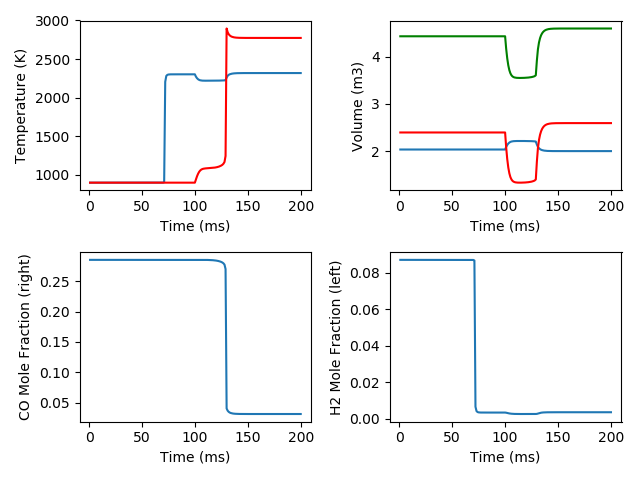

In [4]:
# plot the results
plt.subplot(2,2,1)
plt.plot(states1.t, states1.T, '-', states2.t, states2.T, 'r-')
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2,2,2)
plt.plot(states1.t, states1.v,'-', states2.t, states2.v, 'r-',
         states1.t, states1.v + states2.v, 'g-')
plt.xlabel('Time (ms)')
plt.ylabel('Volume (m3)')
plt.subplot(2,2,3)
plt.plot(states2.t, states2('CO').X)
plt.xlabel('Time (ms)')
plt.ylabel('CO Mole Fraction (right)')
plt.subplot(2,2,4)
plt.plot(states1.t, states1('H2').X)
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction (left)')
plt.tight_layout()